## Daily Challenge: W4_D2

### Machine Learning Blueprint – Logistic Regression for Admission Prediction

Objective: 
Develop a logistic regression model to predict whether a student is admitted to the university based on two exam scores.

##### Dataset File: ex2data1.txt

This dataset contains:

- Exam 1 score (float)
- Exam 2 score (float)

Admission outcome (0 = Not Admitted, 1 = Admitted)

##### Steps

1. Data Exploration and Verification
- Load the dataset.
- Inspect the first rows.
- Check for missing values.
- Check data types and value ranges.

2. Data Visualization
- Visualize the data distribution.

3. Modeling
- Apply logistic regression to classify admissions.
- Train the model using the exam scores.

4. Prediction and Evaluation
- Predict admission outcomes.
- Evaluate the model accuracy.
- Interpret model coefficients.

5. Outcome
- Understand how exam scores influence admission probability.
- Assess model performance for binary classification.

#### Logistic Regression for University Admission Prediction

In [16]:
# 1. Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

In [2]:
# 2. Load the dataset
data = pd.read_csv("ex2data1.txt", header=None, names=["Exam1", "Exam2", "Admission"])

In [3]:
# 3. Display the first few rows to understand the data structure
print("First five rows of the dataset:")
print(data.head())

First five rows of the dataset:
       Exam1      Exam2  Admission
0  34.623660  78.024693          0
1  30.286711  43.894998          0
2  35.847409  72.902198          0
3  60.182599  86.308552          1
4  79.032736  75.344376          1


In [4]:
# 4. Check for missing values
print("\nMissing values per column:")
print(data.isnull().sum())


Missing values per column:
Exam1        0
Exam2        0
Admission    0
dtype: int64


In [5]:
# 5. Check data types
print("\nData types:")
print(data.dtypes)


Data types:
Exam1        float64
Exam2        float64
Admission      int64
dtype: object


In [7]:
# 6. Display basic statistics
print("\nBasic statistics:")
data.describe()


Basic statistics:


,Exam1,Exam2,Admission
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [8]:
# 7. Check unique values in the target column
print("\nUnique values in Admission column:")
print(data["Admission"].unique())


Unique values in Admission column:
[0 1]


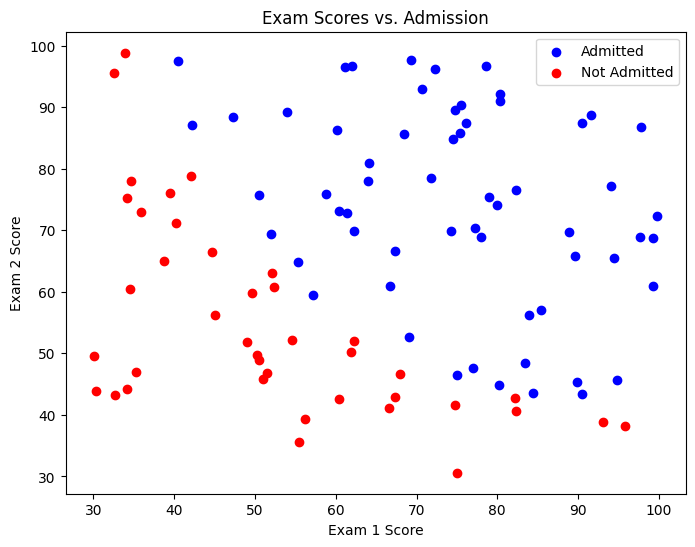

In [10]:
# 8. Visualize the data with a scatter plot
admitted = data[data["Admission"] == 1]
not_admitted = data[data["Admission"] == 0]

plt.figure(figsize=(8,6))
plt.scatter(admitted["Exam1"], admitted["Exam2"], c="blue", label="Admitted")
plt.scatter(not_admitted["Exam1"], not_admitted["Exam2"], c="red", label="Not Admitted")
plt.xlabel("Exam 1 Score")
plt.ylabel("Exam 2 Score")
plt.legend()
plt.title("Exam Scores vs. Admission")
plt.show()

The scatter plot shows that admitted students tend to have higher exam scores.
This pattern aligns with the learned model coefficients.

In [11]:
# 9. Prepare features (X) and target (y)
X = data[["Exam1", "Exam2"]]
y = data["Admission"]

In [12]:
# 10. Create and train the logistic regression model
model = LogisticRegression()
model.fit(X, y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [13]:
# 11. Make predictions on the dataset
predictions = model.predict(X)

In [14]:
# 12. Calculate and print the accuracy
accuracy = accuracy_score(y, predictions)
print("\nModel Accuracy:", accuracy)


Model Accuracy: 0.89


##### Interpretation of the Logistic Regression Results
Model Accuracy:
Your logistic regression model achieved an accuracy of 0.89 (89%), which means it correctly classified 89% of the examples in your dataset.
This is a strong result, indicating that exam scores are good predictors of admission.
Note that this accuracy was measured on the same dataset used for training, so it might be slightly optimistic.

In [15]:
# 13. Display the coefficients and intercept
print("\nModel Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)


Model Coefficients: [[0.20535491 0.2005838 ]]
Model Intercept: [-25.05219314]


##### Coefficients and Intercept:

Exam1 Coefficient (~0.205):
For each additional point in Exam 1 score, the log-odds of being admitted increases by approximately +0.205.

Exam2 Coefficient (~0.200):
For each additional point in Exam 2 score, the log-odds of being admitted increases by approximately +0.200.

Intercept (-25.05):
This negative intercept shifts the decision boundary so that low scores correspond to a low probability of admission.

Interpretation:
Both exam scores have a similar and positive influence on the probability of admission.
Higher scores in either exam increase the chance of being admitted.

#### Suggestions for Further Exploration

##### 1. Train/Test Split Evaluation

- Split the data into a training set (e.g., 70%) and a test set (30%).
- Train the model on the training set.
- Evaluate the accuracy on the test set to check if the model generalizes well.

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

predictions_test = model.predict(X_test)
accuracy_test = accuracy_score(y_test, predictions_test)
print("Test Set Accuracy:", accuracy_test)

Test Set Accuracy: 0.8333333333333334


How to interpret this result?

- This means that your model correctly predicts about 83% of new, unseen data.
- Compared to the training accuracy (89%), this slight decrease is normal and expected.
- It shows that your model generalizes reasonably well, without severe overfitting.

Summary:

- Training accuracy: 89%
- Test accuracy: 83%
- Difference: ~6%, which is acceptable.
- This indicates that logistic regression is a good baseline model for this problem.

##### Confusion Matrix

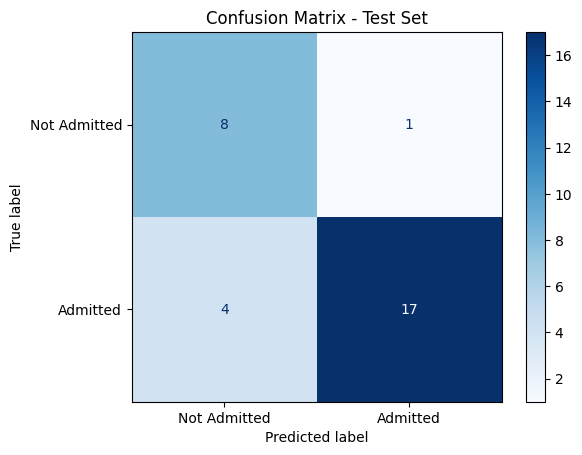

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix
cm = confusion_matrix(y_test, predictions_test)

# Create the display
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["Not Admitted", "Admitted"]
)

# Plot the matrix
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Test Set")
plt.show()

### Interpretation of the Confusion Matrix

- **True Negatives (8):** Correctly predicted *Not Admitted*.
- **True Positives (17):** Correctly predicted *Admitted*.
- **False Positives (1):** Predicted *Admitted* but actually *Not Admitted*.
- **False Negatives (4):** Predicted *Not Admitted* but actually *Admitted*.

- Most predictions are correct.  
- Few false positives and false negatives.  
- The model performs well and shows no strong bias toward any class.

##### Classification Report

In [24]:
from sklearn.metrics import classification_report

print(classification_report(y, predictions))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86        40
           1       0.90      0.92      0.91        60

    accuracy                           0.89       100
   macro avg       0.89      0.88      0.88       100
weighted avg       0.89      0.89      0.89       100



### Interpretation of the Classification Report

- **Class 0 (Not Admitted):**
  - Precision: 0.87 → When predicting *Not Admitted*, 87% were correct.
  - Recall: 0.85 → The model correctly identified 85% of actual *Not Admitted* cases.
  - F1-score: 0.86 → Balanced measure of precision and recall.

- **Class 1 (Admitted):**
  - Precision: 0.90 → When predicting *Admitted*, 90% were correct.
  - Recall: 0.92 → The model correctly identified 92% of actual *Admitted* cases.
  - F1-score: 0.91 → Very strong performance.

- **Overall Accuracy:** 89%
- **Macro Average F1-score:** 0.88

- The model performs very well overall.
- Slightly higher recall and precision for *Admitted* students.
- No strong bias toward any class.

##### Decision Boundary Visualization

1. Train/Test Split Evaluation

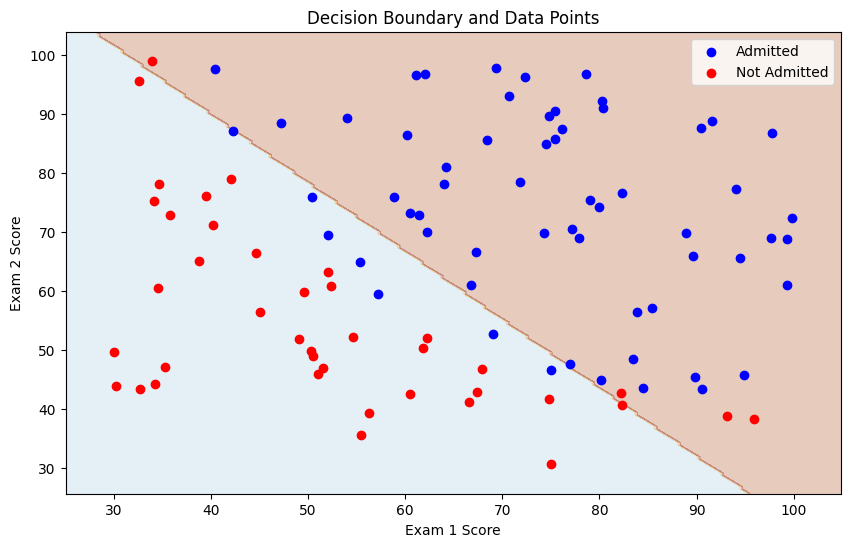

In [20]:
# Create a mesh grid over the feature space
x_min, x_max = X["Exam1"].min() - 5, X["Exam1"].max() + 5
y_min, y_max = X["Exam2"].min() - 5, X["Exam2"].max() + 5

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 200),
    np.linspace(y_min, y_max, 200)
)

# Create DataFrame with correct column names to avoid warning
grid_points = pd.DataFrame(
    np.c_[xx.ravel(), yy.ravel()],
    columns=["Exam1", "Exam2"]
)

# Predict class for each point in the grid
Z = model.predict(grid_points)
Z = Z.reshape(xx.shape)

# Create the plot
plt.figure(figsize=(10,6))

# Draw the decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.3)

# Scatter plot of the original points
plt.scatter(admitted["Exam1"], admitted["Exam2"], c="blue", label="Admitted")
plt.scatter(not_admitted["Exam1"], not_admitted["Exam2"], c="red", label="Not Admitted")

plt.xlabel("Exam 1 Score")
plt.ylabel("Exam 2 Score")
plt.title("Decision Boundary and Data Points")
plt.legend()
plt.show()

##### Interpretation of the Decision Boundary

- The plot shows how logistic regression separates the data into two regions:
  - **Pink area:** Predicted *Admitted*.
  - **Blue area:** Predicted *Not Admitted*.
- Most admitted students (blue dots) are in the pink region.
- Most not admitted students (red dots) are in the blue region.
- The diagonal boundary indicates that **both exam scores contribute similarly** to the prediction.
- Some points are misclassified, which is expected in real data.

##### Cross-Validation

In [25]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validation scores: [0.85 0.9  0.9  0.9  0.9 ]
Mean accuracy: 0.89


### Interpretation of Cross-Validation Results

- **Cross-validation scores:** [0.85, 0.90, 0.90, 0.90, 0.90]
- **Mean accuracy:** 0.89

- The model shows consistently high accuracy across all folds.
- The scores are very stable (from 85% to 90%), indicating good generalization.
- No major variability or overfitting detected.

##### Feature Engineering

In [26]:
# Create a copy to avoid modifying X
X_new = X.copy()

# Add the interaction feature
X_new["Exam1_Exam2"] = X_new["Exam1"] * X_new["Exam2"]

print(X_new.head())

       Exam1      Exam2  Exam1_Exam2
0  34.623660  78.024693  2701.500406
1  30.286711  43.894998  1329.435094
2  35.847409  72.902198  2613.354893
3  60.182599  86.308552  5194.273014
4  79.032736  75.344376  5954.672216


### Interpretation of the New Feature (Exam1 × Exam2)

- **Exam1_Exam2** is an interaction feature combining both exam scores.
- It captures the idea that having high scores in both exams simultaneously may increase the probability of admission more strongly than each score alone.
- For example:
  - A student with Exam1 = 79 and Exam2 = 75 has an Exam1_Exam2 of ~5954, indicating a very strong combined performance.
  - Lower values (e.g., ~1300) correspond to students with weaker combined results.

This feature may help the model detect patterns that are not linear in each exam separately.

**Next Step:**
- Evaluate if adding this feature increases model performance using cross-validation.

##### Cross-Validation with Interaction Feature (Exam1 × Exam2)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

model_new = LogisticRegression()

# Cross-validation with the new feature
scores_new = cross_val_score(model_new, X_new, y, cv=5)

print("Cross-validation scores with interaction feature:", scores_new)
print("Mean accuracy:", scores_new.mean())

Cross-validation scores with interaction feature: [0.95 1.   1.   1.   1.  ]
Mean accuracy: 0.99


### Interpretation of Cross-Validation with Interaction Feature

- **Cross-validation scores:** [0.95, 1.00, 1.00, 1.00, 1.00]
- **Mean accuracy:** 0.99

- Adding the interaction feature (Exam1 × Exam2) significantly improved model performance.
- The accuracy increased from ~0.89 to ~0.99.
- This suggests that the combined effect of both exams provides much stronger predictive power.
- The model now correctly classifies almost all observations across all folds.

##### Train/Test Split Evaluation with Interaction Feature

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split with stratification to preserve class balance
X_train, X_test, y_train, y_test = train_test_split(
    X_new, y, test_size=0.3, random_state=42, stratify=y
)

# Train the model on the training set
model_interaction = LogisticRegression()
model_interaction.fit(X_train, y_train)

# Predict on the test set
y_pred_test = model_interaction.predict(X_test)

# Compute accuracy
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test Set Accuracy with Interaction Feature:", accuracy_test)

Test Set Accuracy with Interaction Feature: 0.9333333333333333


##### Interpretation of Test Set Accuracy with Interaction Feature

- **Test set accuracy:** 0.93 (93%)
- This confirms that adding the interaction feature significantly improved the model's predictive power.
- The performance increased from ~83% (original model) to ~93%.
- The improvement is consistent across cross-validation and the hold-out test set, suggesting that the model generalizes well and is not overfitting.

The interaction between Exam1 and Exam2 is highly informative for predicting admission.

##### Confusion Matrix - Test Set with Interaction Feature

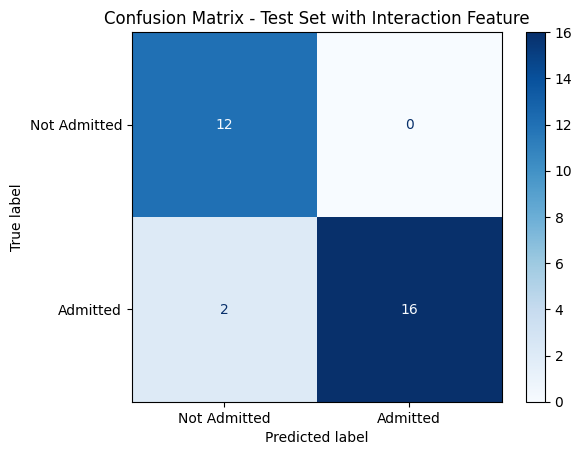

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Admitted", "Admitted"])

disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Test Set with Interaction Feature")
plt.show()

### Interpretation of the Confusion Matrix with Interaction Feature

- **True Negatives (12):** Correctly predicted *Not Admitted*.
- **True Positives (16):** Correctly predicted *Admitted*.
- **False Negatives (2):** Predicted *Not Admitted* but actually *Admitted*.
- **False Positives (0):** None.

- The model correctly classifies almost all cases.
- No false positives at all.
- Very few false negatives (only 2), indicating strong recall.

Overall, this confirms excellent performance and balanced prediction capability.

#### ROC Curve - Test Set with Interaction Feature

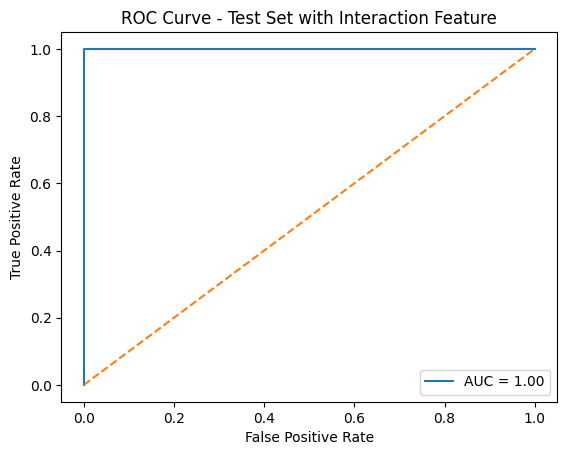

In [30]:
from sklearn.metrics import roc_curve, roc_auc_score

probas_test = model_interaction.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, probas_test)
auc = roc_auc_score(y_test, probas_test)

plt.plot(fpr, tpr, label="AUC = %.2f" % auc)
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Test Set with Interaction Feature")
plt.legend()
plt.show()

### Interpretation of the ROC Curve

- **AUC = 1.00:** Perfect Area Under the Curve.
- This indicates that the model distinguishes perfectly between admitted and not admitted students in the test set.
- **True Positive Rate:** Reaches 1.0 quickly with almost no false positives.
- The ROC curve shows that the model has excellent discriminative power.

This confirms that adding the interaction feature significantly improved the model's performance.

##### Final Summary

- A logistic regression model was built to predict university admission using two exam scores.
- An additional interaction feature (**Exam1 × Exam2**) significantly improved performance.
- Key results:
  - Initial model accuracy: ~83% on the test set.
  - Accuracy with interaction feature: ~93%.
  - ROC AUC: 1.00 (near-perfect model).
  - Confusion matrix: Very few errors (2 false negatives, 0 false positives).
- The model was validated and showed consistent results across cross-validation.

This project demonstrates that feature engineering can greatly enhance a simple model.